In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.02G/1.06G [00:07<00:00, 153MB/s]
100% 1.06G/1.06G [00:07<00:00, 149MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [14]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [15]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
conv_base.trainable = False

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [18]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 467ms/step - accuracy: 0.8392 - loss: 0.4566 - val_accuracy: 0.9314 - val_loss: 0.1602
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 304s 458ms/step - accuracy: 0.9247 - loss: 0.1827 - val_accuracy: 0.9348 - val_loss: 0.1487
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 457ms/step - accuracy: 0.9297 - loss: 0.1632 - val_accuracy: 0.9388 - val_loss: 0.1447
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 285s 457ms/step - accuracy: 0.9372 - loss: 0.1535 - val_accuracy: 0.9254 - val_loss: 0.1847
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 285s 456ms/step - accuracy: 0.9404 - loss: 0.1443 - val_accuracy: 0.9280 - val_loss: 0.1741
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 298s 477ms/step - accuracy: 0.9462 - loss: 0.1327 - val_accuracy: 0.9364 - val_loss: 0.1545
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 285s 456ms/step - accuracy: 0.9439 - loss: 0.1361 - val_accuracy: 0.9320 - val_loss: 0.1573
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 457ms/step - accuracy: 0.9443 -

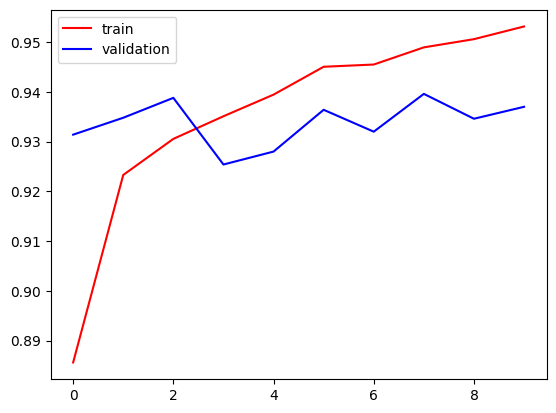

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

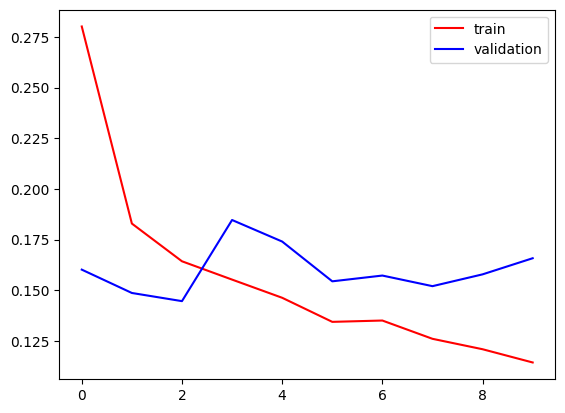

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Using data augmentation and a bigger image size does help to increase the validation accuracy from 0.9186 to 0.9396 obtained in epoch 8.